In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [8]:
df_encoded = pd.read_csv("C:/Program Files/R Files/cleaned_data.csv")
df_encoded

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,...,Gender,Age,Work,Degree,Reference,Playstyle,GAD_T,SWL_T,SPIN_T,Residence_ISO3
0,0,0,0,0,1,0,0,Not difficult at all,3,5,...,Male,25,Unemployed / between jobs,Bachelor (or equivalent),Reddit,singleplayer,1,23,5.0,USA
1,1,2,2,2,0,1,0,Somewhat difficult,3,5,...,Male,41,Unemployed / between jobs,Bachelor (or equivalent),Reddit,multiplayer online with strangers,8,16,33.0,USA
2,0,0,0,0,0,0,0,Not difficult at all,2,5,...,Male,28,Employed,Bachelor (or equivalent),Reddit,multiplayer online with online acquaintances...,0,17,11.0,USA
3,2,1,2,2,2,3,2,Very difficult,2,2,...,Male,19,Employed,High school diploma (or equivalent),Reddit,multiplayer online with strangers,14,14,13.0,KOR
4,0,0,0,0,0,1,0,Not difficult at all,3,5,...,Male,24,Employed,Bachelor (or equivalent),Reddit,multiplayer online with real life friends,1,17,13.0,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12076,1,0,0,1,0,1,1,Not difficult at all,6,6,...,Male,22,Student at college / university,Master (or equivalent),Reddit,multiplayer online with strangers,4,28,7.0,FRA
12077,3,3,3,3,2,3,3,Extremely difficult,5,5,...,Female,20,Student at college / university,High school diploma (or equivalent),Reddit,multiplayer online with strangers,20,23,25.0,USA
12078,0,0,0,0,0,0,0,Not difficult at all,6,6,...,Male,19,Student at college / university,High school diploma (or equivalent),Reddit,multiplayer online with real life friends,0,32,10.0,NOR
12079,3,2,1,3,0,1,3,Somewhat difficult,2,6,...,Female,18,Student at school,High school diploma (or equivalent),Reddit,singleplayer,13,16,32.0,CAN


In [9]:
X = df_encoded.drop(columns=["GAD_T", "SWL_T", "SPIN_T"])  # 预测 SWL_T
y = df_encoded["SWL_T"]

In [10]:
X = X.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
y_pred = model.predict(X_test[:5])
y_pred = [round(value, 2) for value in y_pred]
print("\nSWL_T prediction:", np.round(y_pred, 2))


SWL_T prediction: [19.1  31.76 25.31 26.07 27.21]


In [17]:
feature_importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importances)[::-1]
sorted_features = [feature_names[i] for i in indices]
sorted_importances = feature_importances[indices]
top_features = list(zip(sorted_features[:10], sorted_importances[:10]))
print("Top 10 most important features affecting SWL_T:")
for feature, importance in top_features:
    print(f"{feature}: {importance:.4f}")

Top 10 most important features affecting SWL_T:
SWL3: 0.5925
SWL1: 0.1657
SWL5: 0.1082
SWL2: 0.0663
SWL4: 0.0598
Hours: 0.0005
streams: 0.0005
Residence_ISO3: 0.0004
Age: 0.0003
League: 0.0003


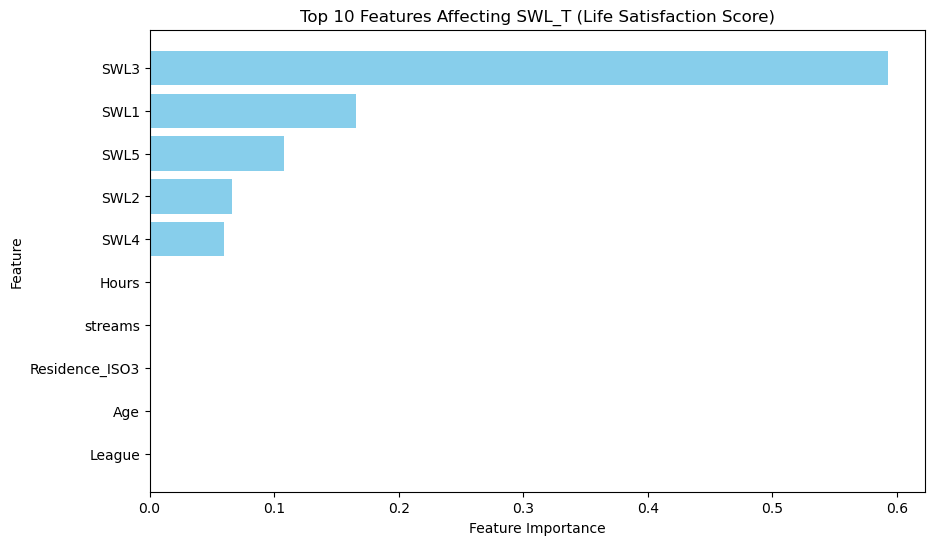

In [18]:
plt.figure(figsize=(10, 6))
plt.barh(sorted_features[:10], sorted_importances[:10], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 10 Features Affecting SWL_T (Life Satisfaction Score)")
plt.gca().invert_yaxis()
plt.show()